# #NoEstimates - Forecasting with Monte Carlo



This example shows you can use a monte carlo simulation with cycle time from previous work items to forecast how long the next work items will take. This article is inspired from previous publication form _Klaus Leopold, Vasco Duarte and Daniel S. Vacanti_. For more details have look at the __reference section__.

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

from datetime import datetime
from datetime import timedelta  
import random
import numpy as np

"When will it be done?"  So we want to know when are the next work items are done.

In [15]:
total_work_items = 30

In [16]:
cycle_times = [2, 3, 5, 8, 3, 5 , 6, 2, 8, 1, 4, 3, 1]

In [17]:
def cumulative_sum(total_work_items, cycle_times, selector):
    total = [0]
    for i, e in enumerate(range(total_work_items)):
            total.append(selector(cycle_times) + total[i])
    return total    

In [18]:
num_of_iterations = 1000

In [19]:

cumulative_sum_min = cumulative_sum(total_work_items, cycle_times, min)
cumulative_sum_max = cumulative_sum(total_work_items, cycle_times, max)
cumulative_random = cumulative_sum(total_work_items, cycle_times, random.choice)

list_random_walks = []

for i in range(num_of_iterations):
    list_random_walks.append(cumulative_sum(total_work_items, 
                                            cycle_times, random.choice))

In [20]:
range_work_items = [x for x in range(total_work_items + 1)]

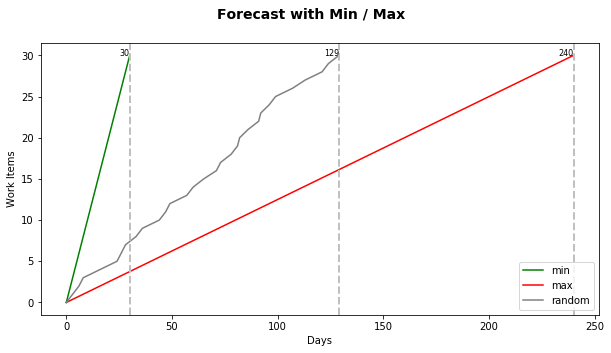

In [21]:

fig, ax = plt.subplots(figsize=(10, 5))


fig.suptitle('Forecast with Min / Max', fontsize=14, fontweight='bold')

plt.plot(cumulative_sum_min, range_work_items, label='min',  color='green')
plt.plot(cumulative_sum_max, range_work_items, label='max', color='red')
plt.plot(cumulative_random, range_work_items, label='random', color='gray')

value_max = cumulative_sum_max[-1]
value_min = cumulative_sum_min[-1]
value_random =  cumulative_random[-1]

plt.axvline(value_max, color='silver', linestyle='dashed', linewidth=2)
plt.axvline(value_min, color='silver', linestyle='dashed', linewidth=2)
plt.axvline(value_random, color='silver', linestyle='dashed', linewidth=2)

t = ax.text(value_max, total_work_items, value_max, ha="right", size=8)
t = ax.text(value_min, total_work_items, value_min, ha="right", size=8)
t = ax.text(value_random, total_work_items, value_random, ha="right", size=8)

ax.set_xlabel("Days")
ax.set_ylabel("Work Items")

plt.legend(loc='lower right')


plt.show()

#ax.xaxis.tick_top()

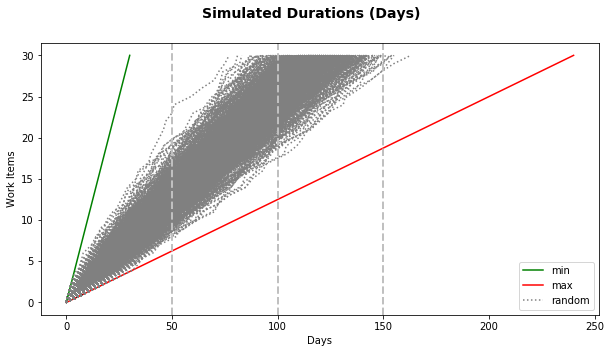

In [22]:
fig, ax = plt.subplots(figsize=(10, 5))

fig.suptitle('Simulated Durations (Days)', fontsize=14, fontweight='bold')

plt.plot(cumulative_sum_min, range_work_items, label='min',  color='green')
plt.plot(cumulative_sum_max, range_work_items, label='max', color='red')
plt.plot(0, 0, linestyle='dotted', color='gray', label='random')

for r in list_random_walks:
    plt.plot(r, range_work_items, linestyle='dotted', color='gray')



plt.axvline(50, color='silver', linestyle='dashed', linewidth=2)
plt.axvline(100, color='silver', linestyle='dashed', linewidth=2)
plt.axvline(150, color='silver', linestyle='dashed', linewidth=2)

ax.set_xlabel("Days")
ax.set_ylabel("Work Items")

plt.legend(loc='lower right')
plt.show()


In [23]:
totals = []

for i in list_random_walks:
    totals.append(i[-1])


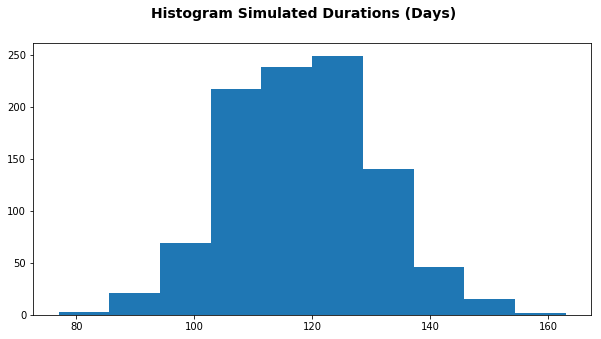

In [24]:
fig, ax = plt.subplots(figsize=(10, 5))
fig.suptitle('Histogram Simulated Durations (Days)', fontsize=14, fontweight='bold')
plt.hist(totals);

In [54]:
q = [50, 85, 90, 95, 99]
p = np.percentile(totals, q)
p

array([ 118.,  131.,  134.,  140.,  148.])

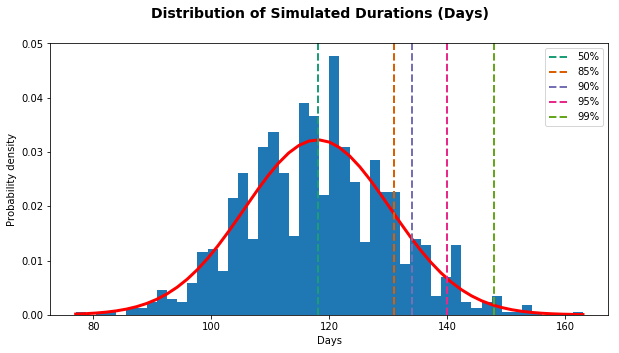

In [55]:
fig, ax = plt.subplots(figsize=(10, 5))

fig.suptitle('Distribution of Simulated Durations (Days)', fontsize=14, fontweight='bold')

num_bins = 50

mu = np.median(totals)
sigma = np.std(totals)

# the histogram of the data
n, bins, patches = ax.hist(totals, num_bins, normed=1)

# add a 'best fit' line
y = mlab.normpdf(bins, mu, sigma)
ax.plot(bins, y, color='red', linestyle='solid', linewidth=3)
ax.set_xlabel('Days')
ax.set_ylabel('Probability density')

cm = plt.cm.get_cmap('Dark2')


for i, v in enumerate(p):
    plt.axvline(v, color=cm.colors[i], linestyle='dashed', linewidth=2, label=str(q[i]) + '%')
 

plt.legend(loc='upper right')
plt.show()
